# Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import geopandas as gpd
import plotly.express as px

## Acts and laws dataset

In [2]:
act_data = pd.read_csv('GBV_Pa.csv.csv')
act_data.head()

,Unnamed: 0,Unnamed: 0.1,Country,Title,Year,Form of Violence,Full_Text,Brief_Description,Source of Info,Full_Text_Language,...,Income group,Rank_2020,Lower or single House Elections_2020,Lower or single House Seats_2020,Lower or single House Women_2020,Lower or single House % of Women_2020,Upper chamber Elections_2020,Upper chamber Seats_2020,Upper chamber Women_2020,Upper chamber % of Women_2020
0,0,0,Tanzania,Law Prohibiting Child Marriage (Education Act),2016,Child early and forced marriage,According to the bill supplement published by ...,NaN,"[http://parliament.go.tz/"" target=""_blank]Parl...",English,...,Lower middle income,34.0,10.2015,393,145,36.9,-,-,-,-
1,1,1,Tanzania,National Strategy for Gender Development,2005,Female genital mutilation,The National Strategy for Gender Development r...,National Strategy for Gender Development,Response of the Government of the United Repub...,English,...,Lower middle income,34.0,10.2015,393,145,36.9,-,-,-,-
2,2,2,Tanzania,Sexual Offences Special Provisions Act (FGM),1998,Violence against women and girls,In 1998 the Parliament enacted the Sexual Offe...,Sexual Offences Special Provisions Act (FGM),CEDAW/C/TZA/6 paras. 26 and 49.\n\n\nThe Gover...,English,...,Lower middle income,34.0,10.2015,393,145,36.9,-,-,-,-
3,3,3,Tanzania,Anti Trafficking of Persons Act,2008,Trafficking,"The Anti Trafficking of Persons Act, 2008 appl...",NaN,The Government of The United Republic of Tanza...,English,...,Lower middle income,34.0,10.2015,393,145,36.9,-,-,-,-
4,4,4,Tanzania,Gender Indicators Booklet,2010,Violence against women and girls,The Gender Indicators Booklet (2010) contains ...,Gender Indicators Booklet,Poverty Eradication and Economic Empowerment D...,NaN,...,Lower middle income,34.0,10.2015,393,145,36.9,-,-,-,-


In [137]:
act_data.shape

(472, 34)

### Different types of violences mentioned here

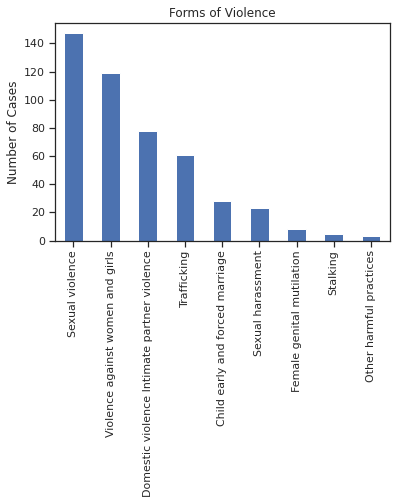

In [9]:
act_data['Form of Violence'].value_counts().plot(kind='bar')
plt.title('Forms of Violence')
plt.ylabel('Number of Cases')
plt.show()

>* We notice that of the different types of violence mentioned here, sexual violence is the most common

### Different types of violence observed in different countries

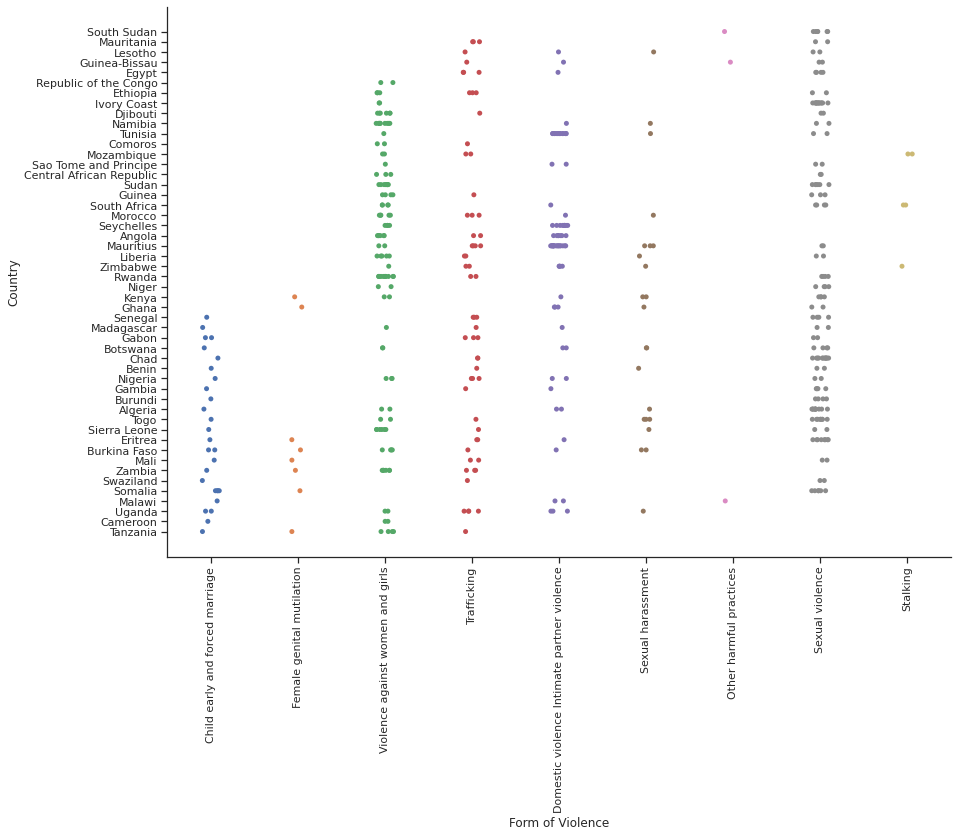

In [5]:
sns.catplot(x="Form of Violence", y="Country", data=act_data, height=8.27,aspect=8/5)
plt.xticks(rotation=90);

>* The above gives a visualization on the spread of violence in different African countries.
>* We see that sexual violence and trafficking are the most common violence.

## Female Dataset

The following analysis considers women between 20 and 24 who were married before the age of 15. The dataset is available here: https://www.unfpa.org/data/dashboard/adolescent-youth


In [10]:
fem = pd.read_csv('vbg_zindi/FemaleData/Percentage of women aged 20-24 who were married before age 15.csv')
fem.head()

,Country,Value
0,Benin,11
1,Burkina Faso,10
2,Cameroon,13
3,Chad,30
4,Comoros,10


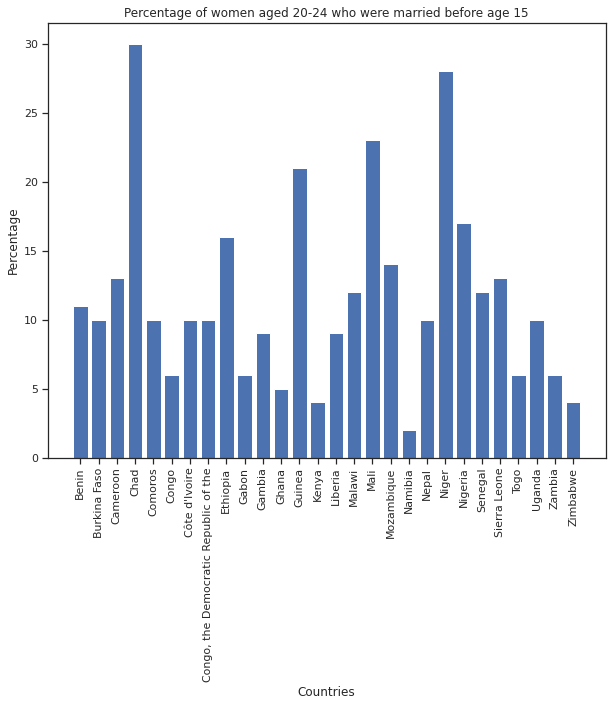

In [11]:
plt.figure(figsize=(10,8))
plt.bar(fem['Country'],fem['Value'])
plt.xticks(rotation=90);
plt.ylabel('Percentage')
plt.xlabel('Countries')
plt.title('Percentage of women aged 20-24 who were married before age 15')
plt.show()

In [15]:
fig = px.choropleth(fem, locations="Country",
                    color="Value",
                    locationmode="country names",
                    scope="africa",
                    title = "Percentage of women aged 20-24 who were married before age 15")
 
fig.show()

>* Here, we see clearly the distribution of the countries where early marriage is prevelant.

>* For example we notice that in Chad nearly 30% of women have been subjected to Child early and forced marriage

>* Though we cannot generalize the geographical location of the countries, we can however note that each of these countries share a common border.



Below the next dataset represent Women and girls, aged 15-49, who have undergone some form of FGM (Female Genital Mutiliation)


In [16]:
fgm = pd.read_csv('FGM.csv')
fgm.head()

,Pays,Valeur
0,Burkina Faso,76
1,Djibouti,93
2,Egypte,91
3,Érythrée,89
4,Ethiopie,74


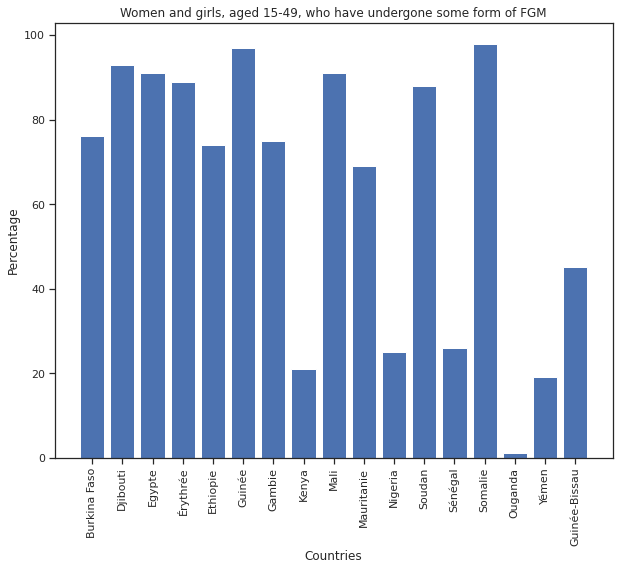

In [17]:
plt.figure(figsize=(10,8))
plt.bar(fgm['Pays'],fgm['Valeur'])
plt.xticks(rotation=90);
plt.ylabel('Percentage')
plt.xlabel('Countries')
plt.title('Women and girls, aged 15-49, who have undergone some form of FGM')
plt.show()

In [18]:
fig = px.choropleth(fgm, locations="Pays",
                    color="Valeur",
                    locationmode="country names",
                    scope="africa",
                    title = "Women and girls, aged 15-49, who have undergone some form of FGM")
 
fig.show()

## Tweets Dataset

### set 1

In [143]:
tweet_1 = pd.read_csv('tweets(1).csv')
tweet_1.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets
0,0,b'RT @odd_joker: #\xe6\x97\xad\xe5\xb7\x9d\xe5...,1390783063920046080,140,2021-05-07 21:38:16,NaN,NaN,und,Twitter Web App,0,2
1,1,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390782227089342464,140,2021-05-07 21:34:57,NaN,NaN,en,Twitter for Android,0,43
2,2,b'\xe2\x81\xa6@JoeManchinWV\xe2\x81\xa9 is rap...,1390782207061544961,183,2021-05-07 21:34:52,NaN,NaN,en,Twitter for iPhone,0,0
3,3,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390781884439859209,140,2021-05-07 21:33:35,NaN,NaN,en,Twitter Web App,0,43
4,4,b'RT @JusticeOzzie: Ms Brittany Higgins : \xe2...,1390780006435987456,140,2021-05-07 21:26:07,NaN,NaN,en,Twitter for Android,0,279


In [6]:
tweet_1['Tweets'][20]

"b'RT @ThePeoplesHubUK: @GoogleExpertUK @do_kinder @BullyingAlberta @DelusionalAcad1 @rossthomson26 @TruthsayerOdet1 @Suzanne_Garrett @MoriMah\\xe2\\x80\\xa6'"

### set 2

In [144]:
tweet_2 = pd.read_csv('tweets.csv')
tweet_2.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinates,lang,source,likes,retweets
0,0,b'@DrMcKinn @MailOnline #SHOCKING \n#Rape\n\n#...,1390818982899249155,102,2021-05-08 00:01:00,NaN,NaN,en,Twitter for Android,0,0
1,1,b'A total lack of surprise. #Morrison/#Berejik...,1390818602685632513,270,2021-05-07 23:59:29,NaN,NaN,en,Twitter for iPad,0,0
2,2,"b'Desde su constituci\xc3\xb3n en el 2014, la ...",1390818178511654914,250,2021-05-07 23:57:48,NaN,NaN,es,Twitter for iPhone,0,0
3,3,"b'RT @KaceyKells: KELLCEY ""This story not only...",1390814593992298496,140,2021-05-07 23:43:33,NaN,NaN,en,Twitter for iPhone,0,10366
4,4,b'RT @Justice4Stuart: Stuart and his Mum and N...,1390812197438246912,139,2021-05-07 23:34:02,NaN,NaN,en,Twitter for Android,0,3


In [8]:
tweet_2['Tweets'][1]

"b'A total lack of surprise. #Morrison/#Berejiklian don\\xe2\\x80\\x99t surprise any more. They treat people who vote for the #lnp like sh%t and every day there is another sh%tty thing. Is anyone surprised that the legal prof still think woman dying in #dv or #rape is collateral damage?'"

### set 3

In [9]:
tweet_3 = pd.read_csv('Tweets.csv')
tweet_3.head()

,tweet,type,semi_type
0,"Well, being the COMPLETE parasite that he is.....",sexual_violence,rape
1,I can't express how sad it makes me that there...,sexual_violence,rape
2,"Dom raped the girl, David enabled it. By provi...",sexual_violence,rape
3,One prosecutor Magistrates courts at the Teddy...,sexual_violence,rape
4,Then she told me 2 drinks in she was barred ou...,sexual_violence,rape


In [10]:
tweet_3['tweet'][1]

"I can't express how sad it makes me that there are 100s of 1000s of vets &amp; wannabes who've forgotten the core of who we are.  An elderly friend was wrapped in barbed wire while Vietcong raped his wife. No reminder of who he's been his whole life breaks the Trump brainwashing."

In [11]:
tweet_3['type'].value_counts()

sexual_violence                 32660
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: type, dtype: int64

>* for this case we also notice that sexual violence  is the dominant stream

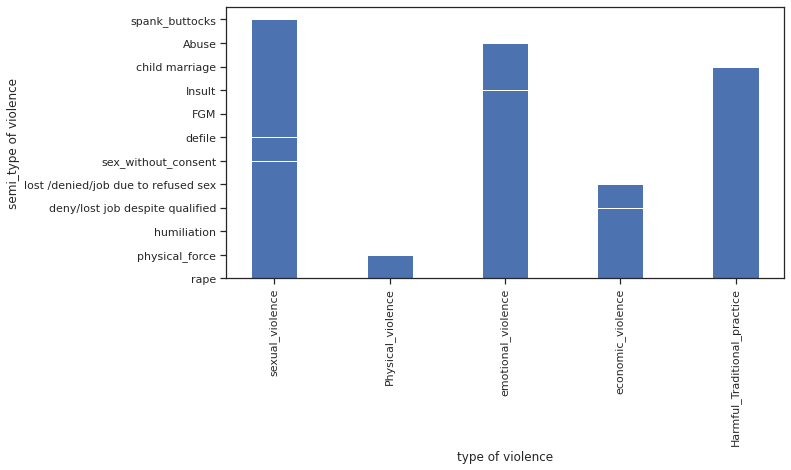

In [15]:
fig = plt.figure(figsize = (10, 5))
plt.bar(tweet_3['type'], tweet_3['semi_type'], width = 0.4)
plt.xlabel("type of violence")
plt.ylabel("semi_type of violence")
plt.xticks(rotation=90);
plt.show()

### set4

In [90]:
gbv = pd.read_csv('GBV_Prevention_Net.csv')
gbv.head()

,Unnamed: 0,Time_Zone,Date,Tweets_tag
0,0,Central Africa Standard Time\t,2021-05-07,"\t\tIn preventing #VAW, it is necessary to und..."
1,1,Central Africa Standard Time\t,2021-05-06,\t\tRT @SamaritanOrgan1: @GBVnet @WIIS_HoA Eve...
2,2,Central Africa Standard Time\t,2021-05-06,\t\tRT @KobugabeLucky: This was such an aspira...
3,3,Central Africa Standard Time\t,2021-05-06,"\t\tRT @aj_emurwon: Wrote A Family Meeting, a ..."
4,4,Central Africa Standard Time\t,2021-05-06,\t\tRT @YfcUganda: Why is it Dangerous? Victim...


In [91]:
gbv['Tweets_tag'][0]

"\t\tIn preventing #VAW, it is necessary to understand and recognize the role of patriarchy in violence against women and girls. Unequal power relations lead to a culture of male dominance, and violence against women is used as a tool for ensuring that this dominance is preserved  https://t.co/TW3KzjnK6I\ten\t[]\t[]\t[]\t0\t23\t37\t['vaw']\t[]\thttps://twitter.com/GBVnet/status/1390525839419269124\tFalse\t0\t1\thttps://pbs.twimg.com/ext_tw_video_thumb/1390525809300017153/pu/img/Ff4XGwEI2MCq3WGn.jpg\t\t\t\t\t\t\t[]"

## Here we will try to perfom sentiment analysis in order to qualifie the type of tweets

### Remove the hashtags, mentions and unwanted characters

In [94]:
def clean_text(text):
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    text = re.sub(r'\\', '', text)
    text = re.sub(r"'", '', text)
    text   = re.sub(r'http?:.*$', '', text)
    text   = re.sub(r'https?:.*$', '', text)
    text   = re.sub(r'pic?.*\/\w*', '', text)
    text   = re.sub(r'[' + string.punctuation + ']+', ' ', text)  # Remove puncutations like 's
    

    return text

In [95]:
gbv['Tweets_clean']=gbv['Tweets_tag'].map(lambda X: clean_text(X))
gbv.head()

,Unnamed: 0,Time_Zone,Date,Tweets_tag,Tweets_clean
0,0,Central Africa Standard Time\t,2021-05-07,"\t\tIn preventing #VAW, it is necessary to und...",in preventing vaw it is necessary to understan...
1,1,Central Africa Standard Time\t,2021-05-06,\t\tRT @SamaritanOrgan1: @GBVnet @WIIS_HoA Eve...,rt gbvnet wiis hoa every day we live by our ...
2,2,Central Africa Standard Time\t,2021-05-06,\t\tRT @KobugabeLucky: This was such an aspira...,rt kobugabelucky this was such an aspirational...
3,3,Central Africa Standard Time\t,2021-05-06,"\t\tRT @aj_emurwon: Wrote A Family Meeting, a ...",rt aj emurwon wrote a family meeting a short s...
4,4,Central Africa Standard Time\t,2021-05-06,\t\tRT @YfcUganda: Why is it Dangerous? Victim...,rt yfcuganda why is it dangerous victimblaming...
...,...,...,...,...,...
3237,3237,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Adelaide Casely-Hayford p...,rt makedacomms adelaide caselyhayford played a...
3238,3238,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Mekatilili wa Menza was a...,rt makedacomms mekatilili wa menza was a kenya...
3239,3239,Central Africa Standard Time\t,2019-08-15,"\t\tRT @MAKEDAComms: In this essay for @AAIHS,...",rt makedacomms in this essay for aaihs jaimees...
3240,3240,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Feminism is not foreign t...,rt makedacomms feminism is not foreign to afri...


### Lemmatization and tokenization

In [96]:
sw = stopwords.words('english')
lemma = WordNetLemmatizer()

In [97]:
def clean_text_and_tokenize(line):
    tokens = TweetTokenizer(strip_handles=True, reduce_len=True).tokenize(line)
    tokens = [w.lower() for w in tokens if w not in sw and len(w) > 2 and w.isalpha()]
    tokens = [lemma.lemmatize(word) for word in tokens]
    
    return tokens

In [98]:
# Application of the function in the Dataframe
gbv['Tweets_clean_tokenize']=gbv['Tweets_tag'].map(lambda X: clean_text_and_tokenize(X))
gbv

,Unnamed: 0,Time_Zone,Date,Tweets_tag,Tweets_clean,Tweets_clean_tokenize
0,0,Central Africa Standard Time\t,2021-05-07,"\t\tIn preventing #VAW, it is necessary to und...",in preventing vaw it is necessary to understan...,"[preventing, necessary, understand, recognize,..."
1,1,Central Africa Standard Time\t,2021-05-06,\t\tRT @SamaritanOrgan1: @GBVnet @WIIS_HoA Eve...,rt gbvnet wiis hoa every day we live by our ...,"[every, day, live, leading, grassroot, organis..."
2,2,Central Africa Standard Time\t,2021-05-06,\t\tRT @KobugabeLucky: This was such an aspira...,rt kobugabelucky this was such an aspirational...,"[this, aspirational, read, canâ, wait, convers..."
3,3,Central Africa Standard Time\t,2021-05-06,"\t\tRT @aj_emurwon: Wrote A Family Meeting, a ...",rt aj emurwon wrote a family meeting a short s...,"[wrote, family, meeting, short, story, imago, ..."
4,4,Central Africa Standard Time\t,2021-05-06,\t\tRT @YfcUganda: Why is it Dangerous? Victim...,rt yfcuganda why is it dangerous victimblaming...,"[why, dangerous, attitude, marginalize, victim..."
...,...,...,...,...,...,...
3237,3237,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Adelaide Casely-Hayford p...,rt makedacomms adelaide caselyhayford played a...,"[adelaide, played, important, role, advocating..."
3238,3238,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Mekatilili wa Menza was a...,rt makedacomms mekatilili wa menza was a kenya...,"[mekatilili, menza, kenyan, woman, leader, led..."
3239,3239,Central Africa Standard Time\t,2019-08-15,"\t\tRT @MAKEDAComms: In this essay for @AAIHS,...",rt makedacomms in this essay for aaihs jaimees...,"[essay, chronicle, african, political, mobiliz..."
3240,3240,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Feminism is not foreign t...,rt makedacomms feminism is not foreign to afri...,"[feminism, foreign, africa, for, century, afri..."


### word cloud where you can see which words are most used in the tweets of its users 

In [99]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

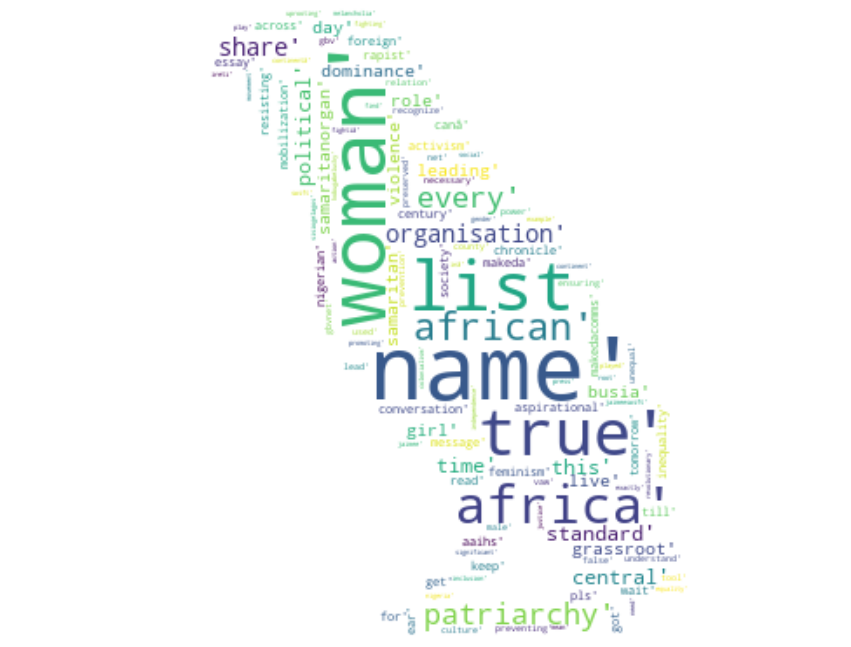

<Figure size 432x288 with 0 Axes>

In [152]:
text = str(gbv['Tweets_clean_tokenize'].values)

def plot_word_cloud(text,masque) :
    
    mask_coloring = np.array(Image.open(str(masque)))
    
    # Définir le calque du nuage des mots
    wc = WordCloud(width=600,height=600,background_color="white", max_words=300, mask = mask_coloring, max_font_size=90,collocations = False, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (15,20))
    wc.generate(text)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.show()
    plt.savefig("GBV_World Cloud")

plot_word_cloud(text, 'oiseau_twitter.jpg')

>* Some of the most use words are: 'Woman', 'africa','true','name','patriarchy', 'violence','girl', 'dominance'....

## Sentiment analysis using Afinn library

In [101]:
from afinn import Afinn

In [102]:
afinn=Afinn()

afinn_scores = [afinn.score(text) for text in gbv.Tweets_clean]
gbv['afinn'] = afinn_scores
gbv[['afinn', 'Tweets_clean']].head()

,afinn,Tweets_clean
0,-8.0,in preventing vaw it is necessary to understan...
1,8.0,rt gbvnet wiis hoa every day we live by our ...
2,2.0,rt kobugabelucky this was such an aspirational...
3,5.0,rt aj emurwon wrote a family meeting a short s...
4,-5.0,rt yfcuganda why is it dangerous victimblaming...


In [103]:
gbv['Sentiment_Type']=''
gbv.loc[gbv.afinn>0,'Sentiment_Type']='POSITIVE'
gbv.loc[gbv.afinn==0,'Sentiment_Type']='NEUTRAL'
gbv.loc[gbv.afinn<0,'Sentiment_Type']='NEGATIVE'
gbv

,Unnamed: 0,Time_Zone,Date,Tweets_tag,Tweets_clean,Tweets_clean_tokenize,afinn,Sentiment_Type
0,0,Central Africa Standard Time\t,2021-05-07,"\t\tIn preventing #VAW, it is necessary to und...",in preventing vaw it is necessary to understan...,"[preventing, necessary, understand, recognize,...",-8.0,NEGATIVE
1,1,Central Africa Standard Time\t,2021-05-06,\t\tRT @SamaritanOrgan1: @GBVnet @WIIS_HoA Eve...,rt gbvnet wiis hoa every day we live by our ...,"[every, day, live, leading, grassroot, organis...",8.0,POSITIVE
2,2,Central Africa Standard Time\t,2021-05-06,\t\tRT @KobugabeLucky: This was such an aspira...,rt kobugabelucky this was such an aspirational...,"[this, aspirational, read, canâ, wait, convers...",2.0,POSITIVE
3,3,Central Africa Standard Time\t,2021-05-06,"\t\tRT @aj_emurwon: Wrote A Family Meeting, a ...",rt aj emurwon wrote a family meeting a short s...,"[wrote, family, meeting, short, story, imago, ...",5.0,POSITIVE
4,4,Central Africa Standard Time\t,2021-05-06,\t\tRT @YfcUganda: Why is it Dangerous? Victim...,rt yfcuganda why is it dangerous victimblaming...,"[why, dangerous, attitude, marginalize, victim...",-5.0,NEGATIVE
...,...,...,...,...,...,...,...,...
3237,3237,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Adelaide Casely-Hayford p...,rt makedacomms adelaide caselyhayford played a...,"[adelaide, played, important, role, advocating...",6.0,POSITIVE
3238,3238,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Mekatilili wa Menza was a...,rt makedacomms mekatilili wa menza was a kenya...,"[mekatilili, menza, kenyan, woman, leader, led...",1.0,POSITIVE
3239,3239,Central Africa Standard Time\t,2019-08-15,"\t\tRT @MAKEDAComms: In this essay for @AAIHS,...",rt makedacomms in this essay for aaihs jaimees...,"[essay, chronicle, african, political, mobiliz...",4.0,POSITIVE
3240,3240,Central Africa Standard Time\t,2019-08-15,\t\tRT @MAKEDAComms: Feminism is not foreign t...,rt makedacomms feminism is not foreign to afri...,"[feminism, foreign, africa, for, century, afri...",3.0,POSITIVE


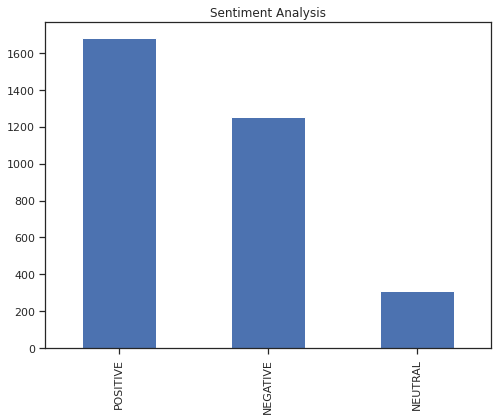

In [151]:
plt.figure(figsize=(8,6))
gbv.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")
plt.show()

>* We observe that more tweets are also  negative

## Conclusion

>* In all the different datasets, we see that sexual violence is the most predominant form of violence.

>* We also saw the country distributions where violence is prevalent. 

>* We suggest that to curb the sexual violence in the underlying countries, investigations should be done on the causes of such violence. 

